In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 1.5 MB 13.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 9.5 MB 1.9 MB/s eta 0:00:011
     |████████████████████████████████| 6.8 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 333 kB/s eta 0:00:01
     |████████████████████████████████| 301 kB 4.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=b6af514a598536a0588765085d128dbdef7644e28741bfcfb631683e7647f2bb
  Stored in directory: /root/.cache/pip/wheels/b3/c8/54/ff7e171

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
tf.debugging.set_log_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(len(gpus))

logical_gpus = tf.config.experimental.list_logical_devices('GPU')
print(len(logical_gpus))

1
1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 8s 2us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28,1 )
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [10]:
def make_dataset(images, labels, epochs, batch_size, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size).prefetch(50)
    return dataset

batch_size = 256
epochs = 100
train_dataset = make_dataset(x_train_scaled, y_train, epochs, batch_size)

Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DummySeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalN

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/r

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 512)         1

In [11]:
history = model.fit(train_dataset, 
                    steps_per_epoch = x_train_scaled.shape[0] // batch_size,
                    epochs=10)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Epoch 1/10
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing 

 69/214 [========>.....................] - ETA: 18s - loss: 2.2836 - accuracy: 0.3236Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


114/214 [==============>...............] - ETA: 10s - loss: 2.2532 - accuracy: 0.3558Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


159/214 [=====================>........] - ETA: 5s - loss: 2.0861 - accuracy: 0.3977Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


204/214 [===========================>..] - ETA: 0s - loss: 1.8793 - accuracy: 0.4450Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 18s 84ms/step - loss: 1.8411 - accuracy: 0.4541
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 2/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 32/214 [===>..........................] - ETA: 10s - loss: 0.9452 - accuracy: 0.6635Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 77/214 [=========>....................] - ETA: 8s - loss: 0.9168 - accuracy: 0.6727Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


122/214 [================>.............] - ETA: 5s - loss: 0.8849 - accuracy: 0.6815Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


167/214 [======================>.......] - ETA: 2s - loss: 0.8625 - accuracy: 0.6882Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


212/214 [============================>.] - ETA: 0s - loss: 0.8360 - accuracy: 0.6974Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 60ms/step - loss: 0.8349 - accuracy: 0.6976
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 3/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 40/214 [====>.........................] - ETA: 10s - loss: 0.7253 - accuracy: 0.7281Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 85/214 [==========>...................] - ETA: 7s - loss: 0.7006 - accuracy: 0.7441Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


130/214 [=================>............] - ETA: 5s - loss: 0.6943 - accuracy: 0.7464Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


175/214 [=======================>......] - ETA: 2s - loss: 0.6823 - accuracy: 0.7502Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 60ms/step - loss: 0.6724 - accuracy: 0.7541
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 4/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
  3/214 [..............................] - ETA: 10s - loss: 0.6083 - accuracy: 0.7760Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 48/214 [=====>........................] - ETA: 9s - loss: 0.6249 - accuracy: 0.7678Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 93/214 [============>.................] - ETA: 7s - loss: 0.6167 - accuracy: 0.7742Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


138/214 [==================>...........] - ETA: 4s - loss: 0.6087 - accuracy: 0.7760Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


183/214 [========================>.....] - ETA: 1s - loss: 0.5984 - accuracy: 0.7798Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.5932 - accuracy: 0.7820
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 5/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 11/214 [>.............................] - ETA: 11s - loss: 0.5515 - accuracy: 0.7912Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 56/214 [======>.......................] - ETA: 9s - loss: 0.5653 - accuracy: 0.7903Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


101/214 [=============>................] - ETA: 6s - loss: 0.5458 - accuracy: 0.7980Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


146/214 [===================>..........] - ETA: 4s - loss: 0.5373 - accuracy: 0.8017Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


191/214 [=========================>....] - ETA: 1s - loss: 0.5330 - accuracy: 0.8045Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.5299 - accuracy: 0.8053
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 6/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 19/214 [=>............................] - ETA: 11s - loss: 0.4932 - accuracy: 0.8211Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 64/214 [=======>......................] - ETA: 8s - loss: 0.4988 - accuracy: 0.8173Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


109/214 [==============>...............] - ETA: 6s - loss: 0.4919 - accuracy: 0.8214Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


154/214 [====================>.........] - ETA: 3s - loss: 0.4858 - accuracy: 0.8243Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


199/214 [==========================>...] - ETA: 0s - loss: 0.4831 - accuracy: 0.8247Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.4818 - accuracy: 0.8253
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 7/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 27/214 [==>...........................] - ETA: 10s - loss: 0.4666 - accuracy: 0.8277Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 72/214 [=========>....................] - ETA: 8s - loss: 0.4575 - accuracy: 0.8315Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


117/214 [===============>..............] - ETA: 5s - loss: 0.4550 - accuracy: 0.8329Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


162/214 [=====================>........] - ETA: 3s - loss: 0.4537 - accuracy: 0.8335Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


207/214 [============================>.] - ETA: 0s - loss: 0.4470 - accuracy: 0.8373Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.4471 - accuracy: 0.8373
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 8/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 35/214 [===>..........................] - ETA: 10s - loss: 0.4323 - accuracy: 0.8387Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 80/214 [==========>...................] - ETA: 7s - loss: 0.4298 - accuracy: 0.8414Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


125/214 [================>.............] - ETA: 5s - loss: 0.4230 - accuracy: 0.8440Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


170/214 [======================>.......] - ETA: 2s - loss: 0.4185 - accuracy: 0.8467Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.4186 - accuracy: 0.8468
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 9/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
 43/214 [=====>........................] - ETA: 9s - loss: 0.4063 - accuracy: 0.8463 Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 88/214 [===========>..................] - ETA: 7s - loss: 0.3952 - accuracy: 0.8539Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


133/214 [=================>............] - ETA: 4s - loss: 0.3972 - accuracy: 0.8540Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


178/214 [=======================>......] - ETA: 2s - loss: 0.3945 - accuracy: 0.8565Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.3958 - accuracy: 0.8557
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Epoch 10/10
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0
  6/214 [..............................] - ETA: 11s - loss: 0.4155 - accuracy: 0.8470Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 51/214 [======>.......................] - ETA: 9s - loss: 0.3850 - accuracy: 0.8567Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


 96/214 [============>.................] - ETA: 6s - loss: 0.3826 - accuracy: 0.8576Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


141/214 [==================>...........] - ETA: 4s - loss: 0.3791 - accuracy: 0.8612Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


186/214 [=========================>....] - ETA: 1s - loss: 0.3789 - accuracy: 0.8613Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:GPU:0


214/214 [==============================] - 13s 59ms/step - loss: 0.3779 - accuracy: 0.8617
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:CPU:0


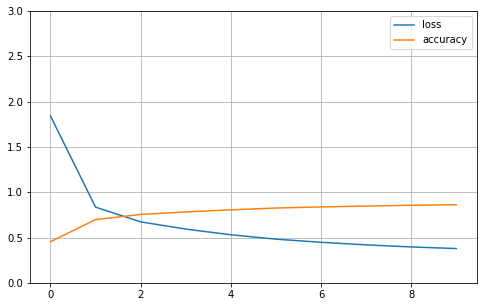

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()
    
plot_learning_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
 58/313 [====>.........................] - ETA: 3s - loss: 0.3688 - accuracy: 0.8642Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
 63/313 [=====>........................] - ETA: 3s - loss: 0.3687 - accuracy: 0.8646Executing op __inference_test_function_5

125/313 [==========>...................] - ETA: 2s - loss: 0.3951 - accuracy: 0.8593Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
130/313 [===========>..................] - ETA: 2s - loss: 0.4001 - accuracy: 0.8575Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5

Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
196/313 [=================>............] - ETA: 1s - loss: 0.3964 - accuracy: 0.8591Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
200/313 [==================>...........] - ETA: 1s - loss: 0.3954 - accuracy: 0.8595Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5

Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
265/313 [========================>.....] - ETA: 0s - loss: 0.3876 - accuracy: 0.8603Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
269/313 [========================>.....] - ETA: 0s - loss: 0.3869 - accuracy: 0.8602Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5290 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_test_function_5

[0.3886485695838928, 0.858299970626831]